# Classificação com Arvore de decisão

In [1]:
import pandas as pd
import numpy as np

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head(3)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no


### Adicionando idade do modelo do carro

Assim, a diferença de idade fica mais analisavel

In [3]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.model_year	
dados.head(2)

,Unnamed: 0,mileage_per_year,model_year,price,sold,idade_do_modelo
0,0,21801,2000,30941.02,yes,24
1,1,7843,1998,40557.96,yes,26


### Excluindo colunas desnecessarias

In [4]:
dados = dados.drop(columns = ["Unnamed: 0","model_year"], axis=1)
dados.head(2)

,mileage_per_year,price,sold,idade_do_modelo
0,21801,30941.02,yes,24
1,7843,40557.96,yes,26


## Separando as variaveis

In [5]:
x = dados[["price", "idade_do_modelo","mileage_per_year"]]
y = dados["sold"]

## Separando treino e teste

In [6]:
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

## Instanciando, fazendo fit e previsao do modelo

In [7]:
from sklearn.tree import DecisionTreeClassifier

# max_depth= Profundidade da arvore (para permitir a visualização)

In [8]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

### Acuracia do modelo

In [9]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 79.28%


# Vizualizando a arvore com Graphviz

!pip install graphviz==0.10

Tambem é uma instalação externa, instalar no anaconda

In [10]:
from sklearn.tree import export_graphviz
import graphviz

In [13]:
#out_file - Quer salvar em um arquivo?
#filled e rounded = Melehorar a visualização em cores e arredondar pontar
#feature_names e class_names = São as colunas dos nossos dados para que possamos ler na arvore

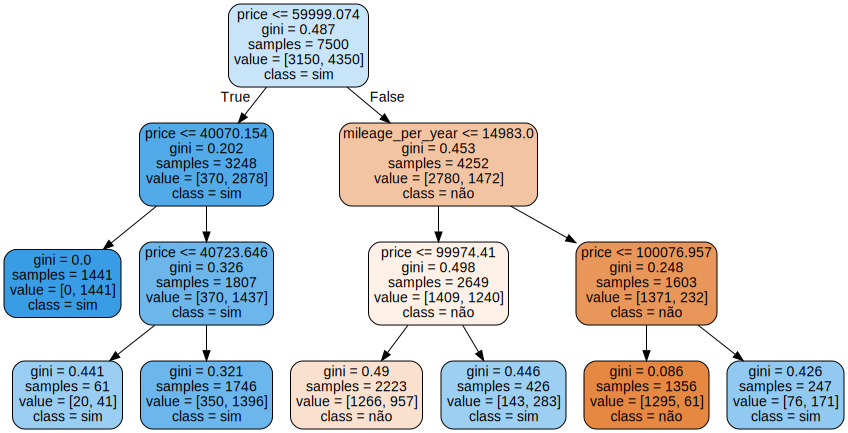

In [14]:
# samples = Quantos dados cairam aqui?
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico